## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/TSLA.csv')
df.head()

,Date,Close
0,7/2/2018,335.070007
1,7/3/2018,310.859985
2,7/5/2018,309.160004
3,7/6/2018,308.899994
4,7/9/2018,318.510010


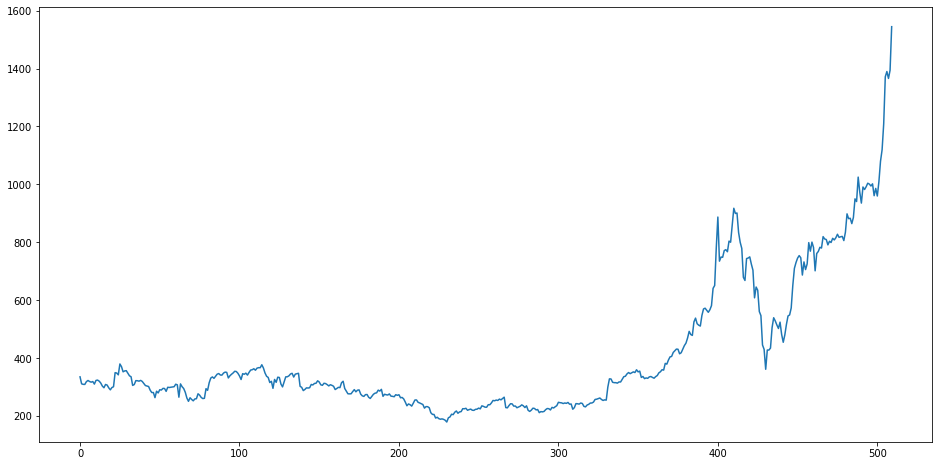

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,335.070007
1,2018-07-03,310.859985
2,2018-07-05,309.160004
3,2018-07-06,308.899994
4,2018-07-09,318.510010


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.1110
Epoch 2/5
8/8 - 1s - loss: 0.0197
Epoch 3/5
8/8 - 1s - loss: 0.0192
Epoch 4/5
8/8 - 1s - loss: 0.0112
Epoch 5/5
8/8 - 1s - loss: 0.0101


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0101
Loss: 0.010083118453621864


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[324.0152 ],
       [287.12967],
       [344.66928],
       [339.83246],
       [287.9058 ],
       [330.59427],
       [304.82095],
       [221.4406 ],
       [238.31628],
       [332.33975],
       [322.13568],
       [237.42882],
       [330.6746 ],
       [332.43976],
       [311.7424 ],
       [326.5934 ],
       [292.79044],
       [252.85762],
       [234.20927],
       [221.21785],
       [319.95328],
       [299.7715 ],
       [274.9723 ],
       [250.0812 ],
       [323.38763],
       [210.27995],
       [289.96918],
       [320.4801 ],
       [273.99484],
       [243.26122],
       [298.20624],
       [292.398  ],
       [316.38553],
       [243.63475],
       [304.85077],
       [302.0647 ],
       [332.0881 ],
       [270.48782],
       [233.75455],
       [283.03986],
       [331.58798],
       [283.19418],
       [213.53091],
       [235.15457],
       [329.44623],
       [232.64552],
       [235.9519 ],
       [291.52438],
       [318.28528],
       [324.6544 ],


In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,324.015198
1,287.129669
2,344.669281
3,339.832458
4,287.905792
...,...
73,310.639465
74,274.793610
75,244.413025
76,344.595428


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[359.519989],
       [262.799988],
       [337.029999],
       [319.769989],
       [337.320007],
       [316.130005],
       [305.799988],
       [221.860001],
       [244.789993],
       [350.480011],
       [344.429993],
       [192.729996],
       [329.940002],
       [381.5     ],
       [346.109985],
       [352.220001],
       [294.799988],
       [239.520004],
       [195.490005],
       [188.220001],
       [347.26001 ],
       [314.73999 ],
       [266.380005],
       [264.880005],
       [346.049988],
       [205.949997],
       [283.359985],
       [331.279999],
       [315.01001 ],
       [242.559998],
       [276.540009],
       [310.700012],
       [297.040009],
       [240.050003],
       [312.839996],
       [294.709991],
       [341.170013],
       [260.      ],
       [238.600006],
       [273.600006],
       [346.      ],
       [329.899994],
       [214.919998],
       [245.199997],
       [336.200012],
       [238.919998],
       [220.830002],
       [261.9

In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,324.015198,359.519989
1,287.129669,262.799988
2,344.669281,337.029999
3,339.832458,319.769989
4,287.905792,337.320007
...,...,...
73,310.639465,348.160004
74,274.793610,330.899994
75,244.413025,247.889999
76,344.595428,348.420013


In [16]:
lstm_model.save("../models/TSLA_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[341.9599 ],
       [345.9684 ],
       [350.61584],
       [355.52676],
       [360.5571 ],
       [365.6004 ],
       [370.00232],
       [373.7603 ],
       [377.3647 ],
       [380.91086],
       [384.6284 ],
       [388.82733],
       [393.72116],
       [398.75128],
       [403.5925 ],
       [409.16187],
       [415.302  ],
       [421.21817],
       [426.76462],
       [431.4477 ],
       [436.34177],
       [441.80444],
       [447.14008],
       [452.36673],
       [457.12927],
       [461.40637],
       [465.52625],
       [470.57016],
       [476.16003],
       [484.3183 ],
       [495.42508],
       [504.97397],
       [513.8467 ],
       [521.4971 ],
       [527.9821 ],
       [534.075  ],
       [539.04266],
       [543.6652 ],
       [548.03674],
       [552.57587],
       [557.4882 ],
       [562.2544 ],
       [566.665  ],
       [569.8886 ],
       [571.9064 ],
       [572.9257 ],
       [572.01166],
       [569.88007],
       [568.1224 ],
       [566.3552 ],


In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,404.040009
371,2019-12-20,405.589996
372,2019-12-23,419.220001
373,2019-12-24,425.250000
374,2019-12-26,430.940002
...,...,...
505,2020-07-06,1371.579956
506,2020-07-07,1389.859985
507,2020-07-08,1365.880005
508,2020-07-09,1394.280029


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,404.040009,341.959900
371,2019-12-20,405.589996,345.968414
372,2019-12-23,419.220001,350.615845
373,2019-12-24,425.250000,355.526764
374,2019-12-26,430.940002,360.557098
...,...,...,...
505,2020-07-06,1371.579956,611.310852
506,2020-07-07,1389.859985,614.776001
507,2020-07-08,1365.880005,617.936523
508,2020-07-09,1394.280029,620.891418


In [23]:
forecast_data.to_csv("../data/predictions/TSLA.csv")

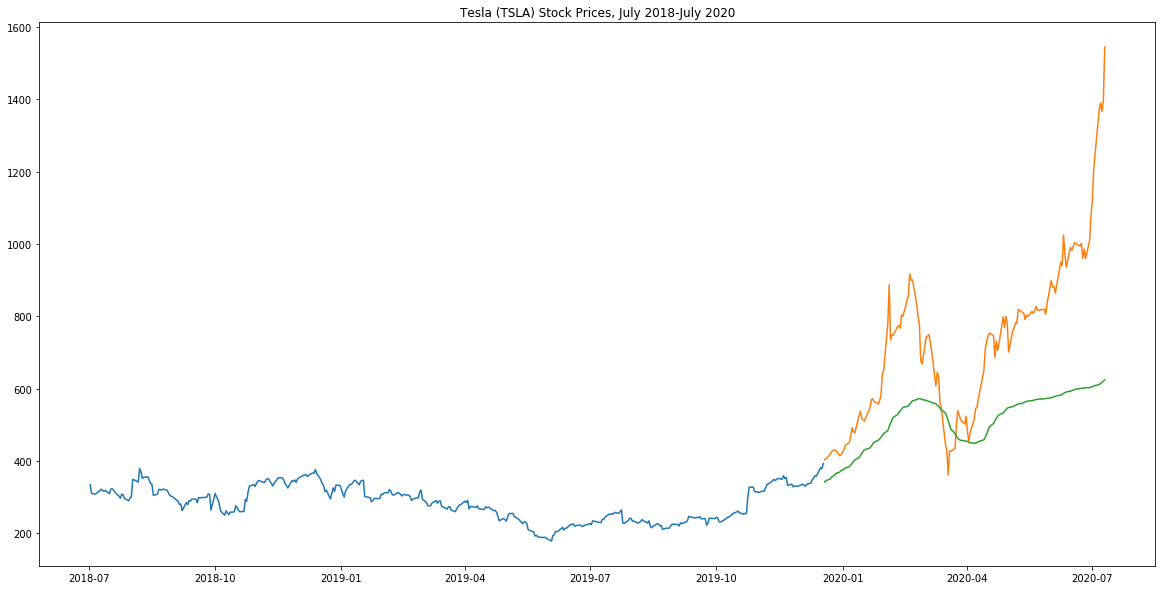

In [24]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("Tesla (TSLA) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/TSLA.png")